In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

### READ DATA

In [37]:
df_intc = pd.read_csv('INTC/INTC_110801_110930.csv')
display(df_intc.head())
display(df_intc.info())

,<TICKER>,<PER>,<DATE>,<TIME>,<LAST>,<VOL>
0,INTC,0,01/09/11,09:30:00,20.25,147
1,INTC,0,01/09/11,09:30:00,20.29,100
2,INTC,0,01/09/11,09:30:00,20.29,100
3,INTC,0,01/09/11,09:30:00,20.29,100
4,INTC,0,01/09/11,09:30:00,20.29,100


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437672 entries, 0 to 437671
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   <TICKER>  437672 non-null  object 
 1   <PER>     437672 non-null  int64  
 2   <DATE>    437672 non-null  object 
 3   <TIME>    437672 non-null  object 
 4   <LAST>    437672 non-null  float64
 5   <VOL>     437672 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 20.0+ MB


None

### AGGREGATE DATA (problem with minutes without second)

1. Concatenate date and time into datetime column
2. Take the mean from every minute

In [38]:
df_intc["<DATETIME>"] = df_intc["<DATE>"] + " " + df_intc["<TIME>"]
#series
s = pd.to_datetime(df_intc["<DATETIME>"], format='%d/%m/%y %H:%M:%S' )  # infer_datetime_format=True)
df_intc["<DATETIME>"] = s
display(df_intc.head())
display(df_intc.info())

,<TICKER>,<PER>,<DATE>,<TIME>,<LAST>,<VOL>,<DATETIME>
0,INTC,0,01/09/11,09:30:00,20.25,147,2011-09-01 09:30:00
1,INTC,0,01/09/11,09:30:00,20.29,100,2011-09-01 09:30:00
2,INTC,0,01/09/11,09:30:00,20.29,100,2011-09-01 09:30:00
3,INTC,0,01/09/11,09:30:00,20.29,100,2011-09-01 09:30:00
4,INTC,0,01/09/11,09:30:00,20.29,100,2011-09-01 09:30:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437672 entries, 0 to 437671
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   <TICKER>    437672 non-null  object        
 1   <PER>       437672 non-null  int64         
 2   <DATE>      437672 non-null  object        
 3   <TIME>      437672 non-null  object        
 4   <LAST>      437672 non-null  float64       
 5   <VOL>       437672 non-null  int64         
 6   <DATETIME>  437672 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 23.4+ MB


None

In [39]:
df_intc_grouped = df_intc.groupby(by=["<DATETIME>"]).mean()
display(df_intc_grouped)
display(df_intc_grouped.info())
display(df_intc_grouped.index)

,<PER>,<LAST>,<VOL>
<DATETIME>,,,
2011-09-01 09:30:00,0.0,20.205919,185.198529
2011-09-01 09:31:00,0.0,20.111818,189.225455
2011-09-01 09:32:00,0.0,20.107403,173.229437
2011-09-01 09:33:00,0.0,20.134333,265.933333
2011-09-01 09:34:00,0.0,20.112909,199.951515
...,...,...,...
2011-09-30 15:55:00,0.0,21.384833,188.258333
2011-09-30 15:56:00,0.0,21.378657,354.641791
2011-09-30 15:57:00,0.0,21.369095,301.215517


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7963 entries, 2011-09-01 09:30:00 to 2011-09-30 15:59:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   <PER>   7963 non-null   float64
 1   <LAST>  7963 non-null   float64
 2   <VOL>   7963 non-null   float64
dtypes: float64(3)
memory usage: 248.8 KB


None

DatetimeIndex(['2011-09-01 09:30:00', '2011-09-01 09:31:00',
               '2011-09-01 09:32:00', '2011-09-01 09:33:00',
               '2011-09-01 09:34:00', '2011-09-01 09:35:00',
               '2011-09-01 09:36:00', '2011-09-01 09:37:00',
               '2011-09-01 09:38:00', '2011-09-01 09:39:00',
               ...
               '2011-09-30 15:49:00', '2011-09-30 15:51:00',
               '2011-09-30 15:52:00', '2011-09-30 15:53:00',
               '2011-09-30 15:54:00', '2011-09-30 15:55:00',
               '2011-09-30 15:56:00', '2011-09-30 15:57:00',
               '2011-09-30 15:58:00', '2011-09-30 15:59:00'],
              dtype='datetime64[ns]', name='<DATETIME>', length=7963, freq=None)

### AGGREGATE INTO NEEDED TIME WINDOW

In [42]:
# freq='H', 'D', ...
df_intc_ready = df_intc_grouped.groupby(pd.Grouper(freq='D')).mean().dropna() 
#puste wiersze to soboty i niedziele (weekendy) - giełda jest wtedy zamknięta (stąd brak danych)
display(df_intc_ready)

,<PER>,<LAST>,<VOL>
<DATETIME>,,,
2011-09-01,0.0,20.152791,291.943253
2011-09-02,0.0,19.734617,285.051007
2011-09-06,0.0,19.346647,258.506511
2011-09-07,0.0,20.006961,273.628889
2011-09-08,0.0,20.051023,296.379112
2011-09-09,0.0,19.883985,309.547199
2011-09-12,0.0,19.961616,261.328171
2011-09-13,0.0,20.575457,260.647851
2011-09-14,0.0,21.043255,239.260814


In [43]:
display(df_intc_ready)

,<PER>,<LAST>,<VOL>
<DATETIME>,,,
2011-09-01,0.0,20.152791,291.943253
2011-09-02,0.0,19.734617,285.051007
2011-09-06,0.0,19.346647,258.506511
2011-09-07,0.0,20.006961,273.628889
2011-09-08,0.0,20.051023,296.379112
2011-09-09,0.0,19.883985,309.547199
2011-09-12,0.0,19.961616,261.328171
2011-09-13,0.0,20.575457,260.647851
2011-09-14,0.0,21.043255,239.260814


### VISUALIZE

In [15]:
display(plt.style.available)
plt.style.use('fivethirtyeight')

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

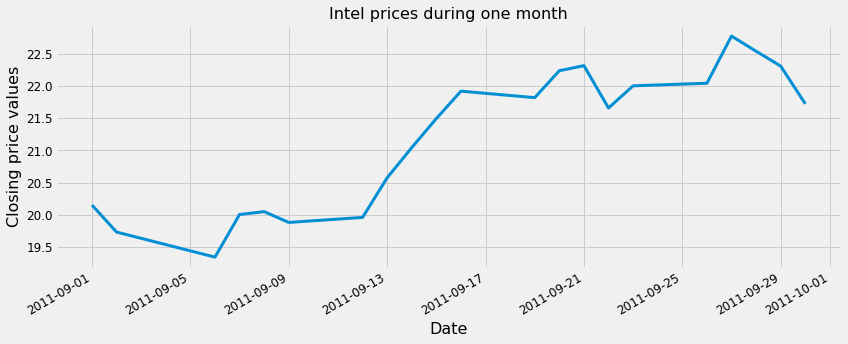

In [51]:
ax = df_intc_ready['<LAST>'].plot(figsize=(12, 5), fontsize=12, linewidth=3, linestyle='solid')
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Closing price values', fontsize=16)
ax.set_title('Intel prices during one month', fontsize=16)
plt.tight_layout()
plt.show()

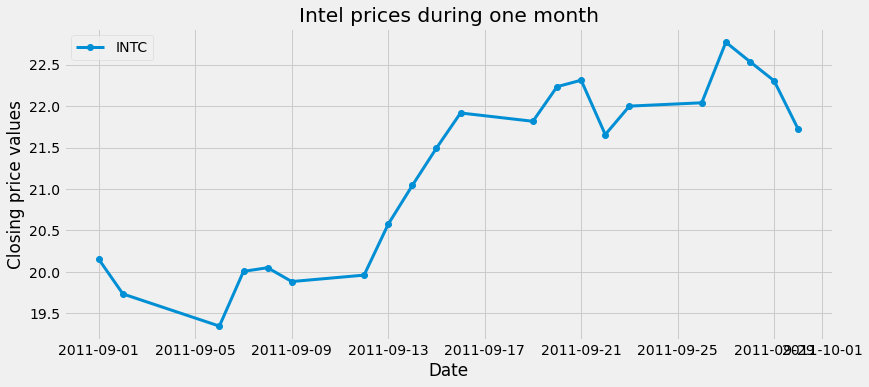

In [61]:
plt.figure(figsize=(12, 5))
plt.plot_date(df_intc_ready.index, df_intc_ready['<LAST>'], linewidth=3, linestyle='solid')
#plt.gcf().autofmt_xdate()
#date_format = mpl_dates.DateFormatter('%d-%m-%Y')
#plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.title('Intel prices during one month')
plt.xlabel('Date')
plt.ylabel('Closing price values')
plt.legend(['INTC'])
plt.show()

In [45]:
df_intc_ready.index

DatetimeIndex(['2011-09-01', '2011-09-02', '2011-09-06', '2011-09-07',
               '2011-09-08', '2011-09-09', '2011-09-12', '2011-09-13',
               '2011-09-14', '2011-09-15', '2011-09-16', '2011-09-19',
               '2011-09-20', '2011-09-21', '2011-09-22', '2011-09-23',
               '2011-09-26', '2011-09-27', '2011-09-28', '2011-09-29',
               '2011-09-30'],
              dtype='datetime64[ns]', name='<DATETIME>', freq=None)

NameError: name 'date_format' is not defined

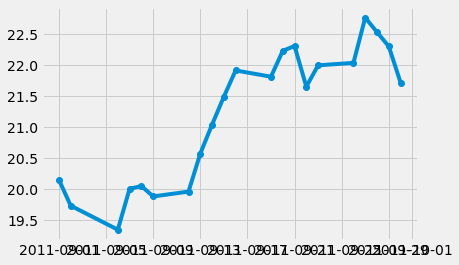

In [48]:
plt.plot_date(df_intc_ready.index, df_intc_ready['<LAST>'], linestyle ='solid')
#plt.tight_layout()
plt.gcf().autofmt_xdate
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.show()

### FASTLY COMBINED TOGETHER

In [62]:
df_intc = pd.read_csv('INTC/INTC_110801_110930.csv')
df_ibm = pd.read_csv('IBM/IBM_110801_110930.csv')
df_pfe = pd.read_csv('PFE/PFE_110801_110930.csv')

In [63]:
df_intc["<DATETIME>"] = df_intc["<DATE>"] + " " + df_intc["<TIME>"]
df_ibm["<DATETIME>"] = df_ibm["<DATE>"] + " " + df_ibm["<TIME>"]
df_pfe["<DATETIME>"] = df_pfe["<DATE>"] + " " + df_pfe["<TIME>"]
s = pd.to_datetime(df_intc["<DATETIME>"], format='%d/%m/%y %H:%M:%S') 
df_intc["<DATETIME>"] = s
s = pd.to_datetime(df_ibm["<DATETIME>"], format='%d/%m/%y %H:%M:%S') 
df_ibm["<DATETIME>"] = s
s = pd.to_datetime(df_pfe["<DATETIME>"], format='%d/%m/%y %H:%M:%S') 
df_pfe["<DATETIME>"] = s

In [64]:
df_intc_grouped = df_intc.groupby(by=["<DATETIME>"]).mean()
df_ibm_grouped = df_ibm.groupby(by=["<DATETIME>"]).mean()
df_pfe_grouped = df_pfe.groupby(by=["<DATETIME>"]).mean()

In [65]:
df_intc_ready = df_intc_grouped.groupby(pd.Grouper(freq='D')).mean().dropna() 
df_ibm_ready = df_ibm_grouped.groupby(pd.Grouper(freq='D')).mean().dropna() 
df_pfe_ready = df_pfe_grouped.groupby(pd.Grouper(freq='D')).mean().dropna() 

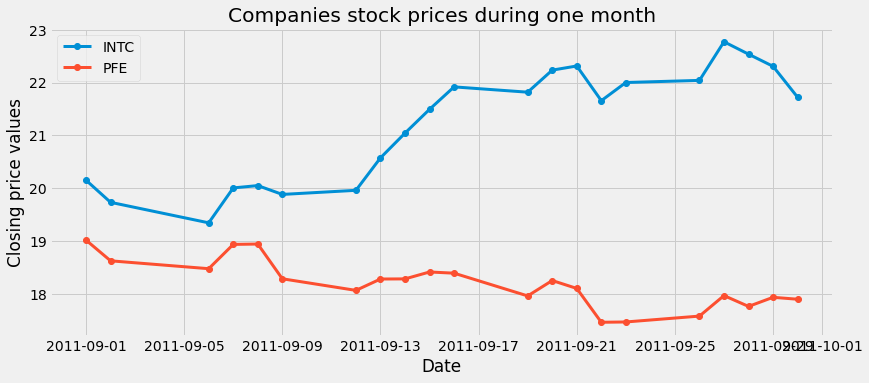

In [69]:
plt.figure(figsize=(12, 5))
plt.plot_date(df_intc_ready.index, df_intc_ready['<LAST>'], linewidth=3, linestyle='solid')
#plt.plot_date(df_ibm_ready.index, df_ibm_ready['<LAST>'], linewidth=3, linestyle='solid')
plt.plot_date(df_pfe_ready.index, df_pfe_ready['<LAST>'], linewidth=3, linestyle='solid')
plt.tight_layout()
plt.title('Companies stock prices during one month')
plt.xlabel('Date')
plt.ylabel('Closing price values')
plt.legend(['INTC', 'PFE'])
plt.show()

### FUNCTION to load and prepare dataframe

In [70]:
def load_prepare_df(path, frequency):
    company = pd.read_csv(path)
    company["<DATETIME>"] = company["<DATE>"] + " " + company["<TIME>"]
    s = pd.to_datetime(company["<DATETIME>"], format='%d/%m/%y %H:%M:%S') 
    company["<DATETIME>"] = s
    company_grouped = company.groupby(by=["<DATETIME>"]).mean()
    company_ready = company_grouped.groupby(pd.Grouper(freq=frequency)).mean().dropna()
    return company_ready

In [75]:
df_intc = load_prepare_df('INTC/INTC_110801_110930.csv', 'D')
df_ibm = load_prepare_df('IBM/IBM_110801_110930.csv', 'D')
df_pfe = load_prepare_df('PFE/PFE_110801_110930.csv', 'D')
df_bac = load_prepare_df('BAC/BAC_110801_110930.csv', 'D')
df_csco = load_prepare_df('CSCO/CSCO_110801_110930.csv', 'D')
df_cvx = load_prepare_df('CVX/CVX_110801_110930.csv', 'D')
df_hd = load_prepare_df('HD/HD_110801_110930.csv', 'D')
'BAC/BAC_110801_110930'
'CSCO/CSCO_110801_110930'
'CVX/CVX_110801_110930'
'HD/HD_110801_110930'

'HD/HD_110801_110930'

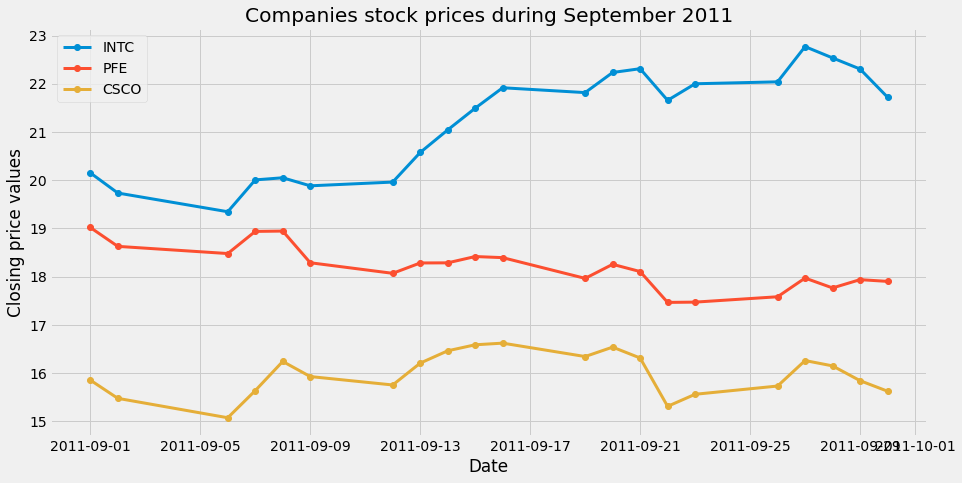

In [89]:
plt.figure(figsize=(14, 7))
plt.plot_date(df_intc.index, df_intc['<LAST>'], linewidth=3, linestyle='solid')
#plt.plot_date(df_ibm.index, df_ibm['<LAST>'], linewidth=3, linestyle='solid')
plt.plot_date(df_pfe.index, df_pfe['<LAST>'], linewidth=3, linestyle='solid')
#plt.plot_date(df_bac.index, df_bac['<LAST>'], linewidth=3, linestyle='solid')
plt.plot_date(df_csco.index, df_csco['<LAST>'], linewidth=3, linestyle='solid')
#plt.plot_date(df_cvx.index, df_cvx['<LAST>'], linewidth=3, linestyle='solid')
#plt.plot_date(df_hd.index, df_hd['<LAST>'], linewidth=3, linestyle='solid')
#plt.tight_layout()
plt.title('Companies stock prices during September 2011')
plt.xlabel('Date')
plt.ylabel('Closing price values')
plt.legend(['INTC', 'PFE', 'CSCO']) # 'IBM', 'PFE', 'BAC', 'CSCO', 'CVX', 'HD'
plt.savefig('Plotted_INTC_PFE_CSCO.png');
plt.show()